# Chargement des données d’images

Jusqu’à présent, nous avons travaillé avec des ensembles de données assez artificiels, peu représentatifs des projets réels.  
Dans la pratique, vous serez souvent amené à manipuler des **images de grande taille**, comme celles issues d’appareils photo ou de téléphones portables.  
Dans ce notebook, nous verrons comment **charger des images** et les utiliser pour **entraîner des réseaux de neurones**.

Nous utiliserons un [jeu de données de photos de chats et de chiens](https://www.kaggle.com/c/dogs-vs-cats) disponible sur **Kaggle**.  
Voici quelques exemples d’images :



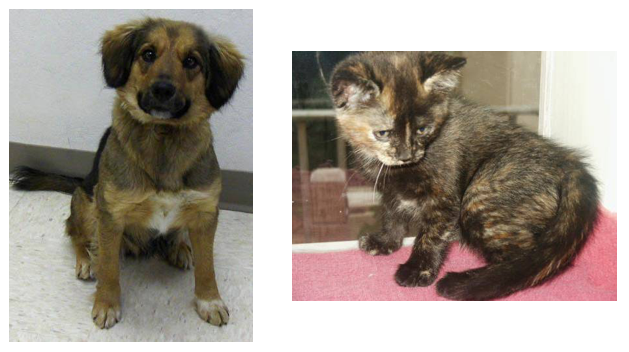

Nous emploierons ce jeu de données pour entraîner un réseau de neurones capable de **distinguer les chats des chiens**.  
Aujourd’hui, cela peut sembler banal, mais il y a encore quelques années, c’était un véritable **défi pour les systèmes de vision par ordinateur**.

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper


La façon la plus simple de charger des images est d’utiliser `datasets.ImageFolder` de la bibliothèque **torchvision** ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)).  
En général, vous utiliserez `ImageFolder` comme ceci :

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
````

où `'path/to/data'` est le chemin d’accès au répertoire contenant les données, et `transform` est une **séquence d’opérations de prétraitement** définies à l’aide du module [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) de `torchvision`.

`ImageFolder` s’attend à une structure de répertoires comme celle-ci :

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

Chaque classe (ici `cat` et `dog`) possède son **propre dossier** contenant les images correspondantes.
Les images sont alors automatiquement **étiquetées** d’après le nom du dossier.
Ainsi, l’image `123.png` sera chargée avec l’étiquette `cat`.

Vous pouvez télécharger le jeu de données déjà structuré de cette manière [ici](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip).
Il est déjà séparé en **jeu d’entraînement** et **jeu de test**.

---

### 🔄 Transformations

Lors du chargement des données avec `ImageFolder`, il faut définir des **transformations (transforms)**.
Par exemple, les images ont des tailles différentes, mais le modèle nécessite qu’elles aient toutes la même taille pour l’entraînement.
On peut donc :

* les **redimensionner** avec `transforms.Resize()`, ou
* les **rogner** avec `transforms.CenterCrop()` ou `transforms.RandomResizedCrop()`.

Il faut également **convertir les images en tenseurs PyTorch** à l’aide de `transforms.ToTensor()`.

En général, ces étapes sont combinées en un pipeline à l’aide de `transforms.Compose()`, qui exécute une liste de transformations dans l’ordre.
Par exemple, pour redimensionner, recadrer, puis convertir en tenseur :

```python
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
```

Il existe de nombreuses autres transformations possibles — consultez la [documentation](http://pytorch.org/docs/master/torchvision/transforms.html) pour plus de détails.

---

### 📦 Data Loaders

Une fois le `ImageFolder` chargé, il faut le passer à un [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader).
Le **DataLoader** prend un dataset (par exemple celui renvoyé par `ImageFolder`) et retourne des **lots (batches)** d’images et leurs **étiquettes** correspondantes.
Vous pouvez régler plusieurs paramètres, comme :

* la **taille des lots (`batch_size`)**,
* et le **mélange des données (`shuffle`)** à chaque époque.

Exemple :

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

L’objet `dataloader` est un **générateur**.
Pour extraire des données, on peut soit boucler dessus, soit le convertir en itérateur et appeler `next()` :

```python
# Boucle pour récupérer un batch à chaque itération
for images, labels in dataloader:
    pass

# Obtenir un seul batch
images, labels = next(iter(dataloader))
```

---

> **Exercice :**
> Chargez les images depuis le dossier `Cat_Dog_data/train`,
> définissez quelques transformations,
> puis construisez le **DataLoader**.



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# setting working Directory
import os
os.chdir('/content/drive/MyDrive/       Deep Learning/cat_dog_image_classification-20251020T013948Z-1-001/cat_dog_image_classification')

In [9]:
%ls

 Cat_Dog_data/   __MACOSX/
 helper.py      'Part 7 - Loading Image Data (exo)_v2.ipynb'


In [ ]:
# extract Cat_Dog_data.zip
#!unzip Cat_Dog_data.zip

In [10]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])# TODO: compose transforms here
dataset = datasets.ImageFolder(data_dir, transform=transform) # TODO: create the ImageFolder
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

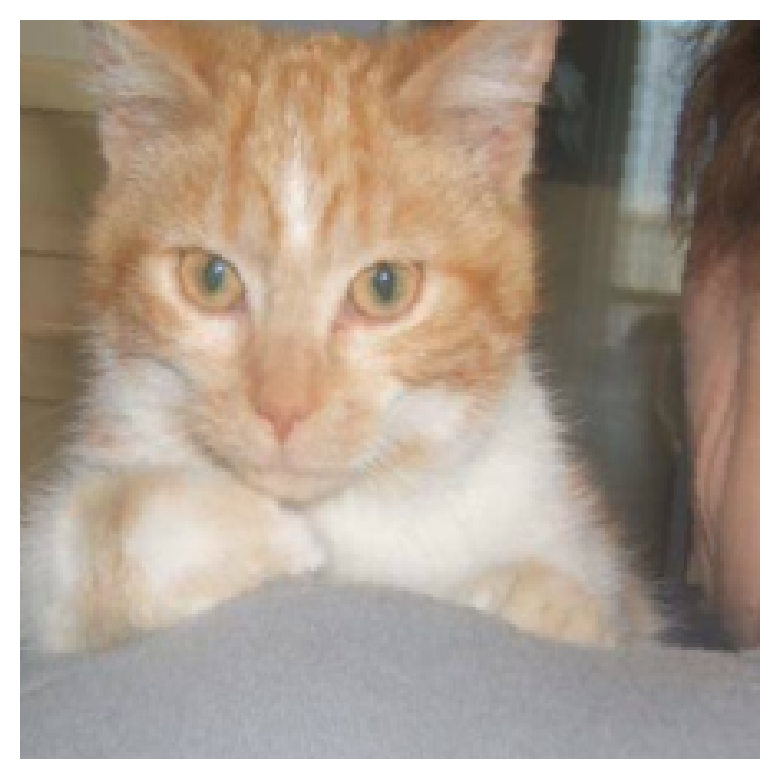

In [7]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

Si vous avez correctement chargé les données, vous devriez obtenir un affichage similaire à celui-ci (votre image sera différente) :




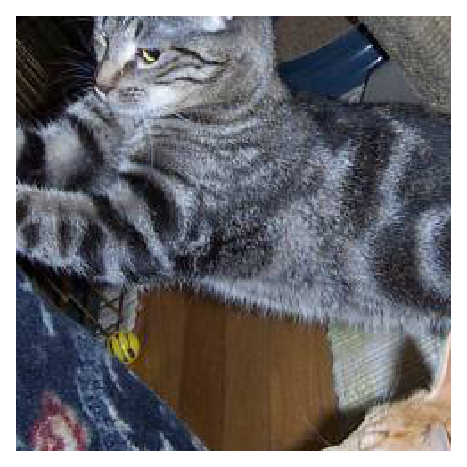


## Augmentation de Données

Une stratégie courante pour entraîner des réseaux de neurones consiste à introduire une **certaine forme d’aléatoire dans les données d’entrée**.  
Par exemple, on peut faire tourner, refléter, redimensionner et/ou rogner aléatoirement les images pendant l’entraînement.  
Cela aide le réseau à **mieux généraliser**, car il voit les mêmes images sous différentes formes : positions, tailles, orientations, etc.

Pour appliquer une rotation, un recadrage et un redimensionnement aléatoires, puis retourner les images horizontalement, on peut définir les transformations ainsi :

```python
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
````

Il est également recommandé de **normaliser les images** à l’aide de `transforms.Normalize`.
Cette transformation prend en entrée :

* une liste de **moyennes** (`mean`)
* et une liste d’**écarts-types** (`std`)

Chaque canal de couleur est alors normalisé selon la formule :

```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Soustraire la moyenne recentre les données autour de zéro,
et diviser par l’écart-type comprime les valeurs entre **-1 et 1**.
Cette normalisation aide à maintenir les **poids du réseau proches de zéro**,
rendant ainsi la **rétropropagation plus stable**.
Sans normalisation, le réseau risque souvent d’échouer à apprendre correctement.

Vous pouvez consulter la **liste complète des transformations disponibles** [ici](http://pytorch.org/docs/0.3.0/torchvision/transforms.html).

Lors des phases de **validation** ou de **test**, on utilise généralement des images **non altérées** (hormis la normalisation).
Ainsi, pour les données de validation ou de test, on se contente en général de **redimensionner** et **recadrer** les images.

---

> **Exercice :**
> Définissez ci-dessous les **transformations** pour les données d’entraînement et de test.
> Ne mettez pas encore la normalisation.

```



In [8]:
data_dir = 'Cat_Dog_data'

# Définition des statistiques de normalisation standard pour ImageNet
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation!
])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = False)

In [9]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

In [10]:
images, labels = next(data_iter)
labels

tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0])

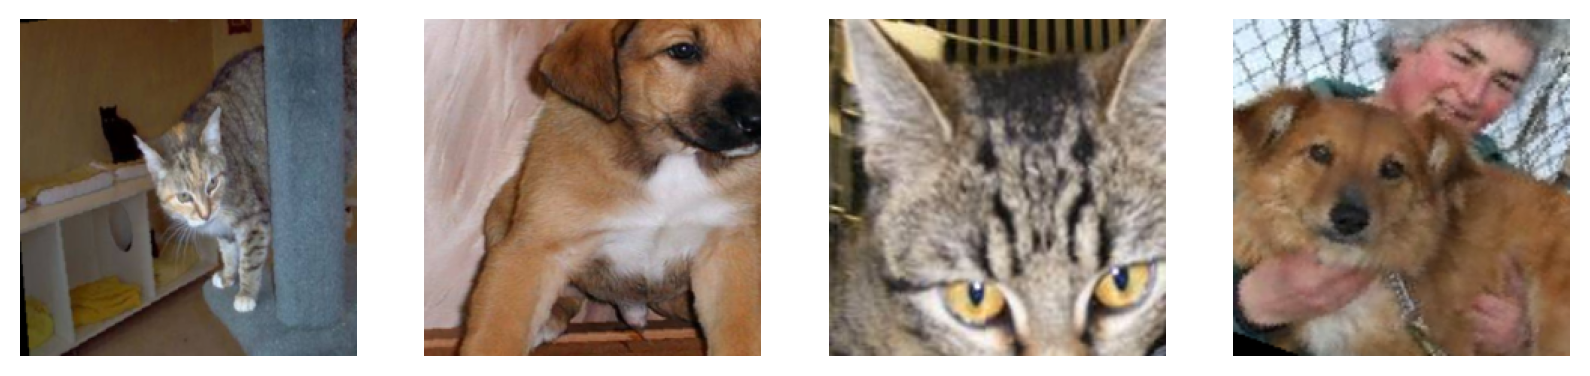

In [11]:


images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize= True)

Vos images transformées devraient ressembler à quelque chose comme ceci.




<center>Training examples:</center>


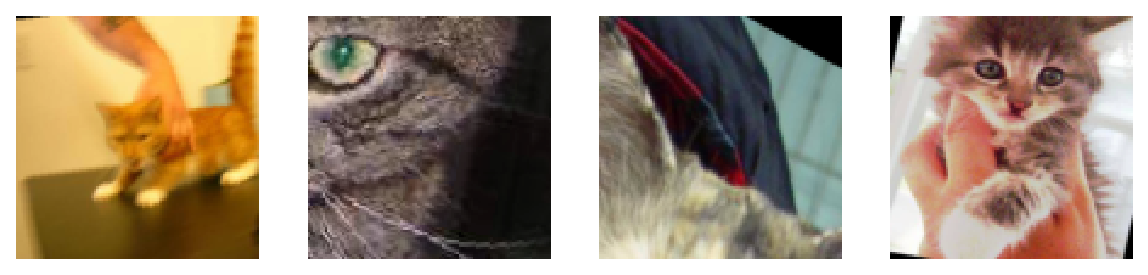

<center>Testing examples:</center>

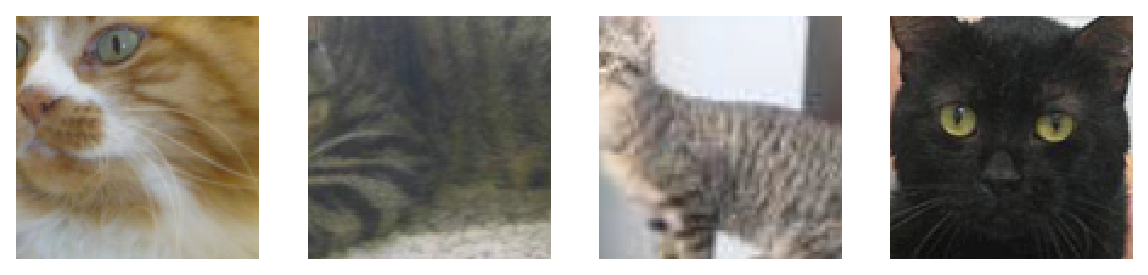


À ce stade, vous devriez être en mesure de charger les données pour l’entraînement et le test.  
Vous pouvez maintenant essayer de construire un réseau capable de **classer les chats et les chiens**.



In [ ]:
#  TODO: Attempt to build a network with CNN to classify cats vs dogs from this dataset
# --- créer un model from scratc

# TP – CNN “from scratch” vs Transfert Learning (Cats vs Dogs)

## Objectif

Comparer **un modèle CNN entraîné from scratch** et **un modèle en transfert d’apprentissage** sur le même jeu de données (cats vs dogs). Montrer l’impact du transfert learning sur la convergence, la performance et la robustesse.

## Ce qui est **obligatoire**

1. **Deux expériences distinctes**

   * Expérience A : CNN **from scratch** (architecture simple minimum 3 bloc avec conv).
   * Expérience B : **Transfert learning** (ex. ResNet, MobileNet, EfficientNet…), couches finales adaptées.
2. **Bonnes pratiques de régularisation**

   * Utiliser **Dropout** ET **Batch Normalization** (justifier où et pourquoi).
3. **Suivi des métriques**

   * **Training loss**, **Accuracy**, **Précision**, **Recall** à chaque époque (et idéalement sur train/val si vous faites une validation).
   * Tracer des **courbes** et **comparer** les deux approches.
4. **Optimisation**

   * Tester au moins **2 optimiseurs** (ex. SGD et Adam).
   * Chercher un **bon learning rate** (essais ou scheduler).
5. **GPU**

   * Entraîner **sur GPU** si disponible (vérification et mention dans README).
6. **Persistance du modèle**

   * **Sauvegarder** le meilleur modèle (.pt/.pth) localement (ne **pas** pousser dans GitHub).
   * **Recharger** le modèle pour faire le **test final** et rapporter les métriques.
7. **Reproductibilité**

   * Fixer un **seed**

## Ce qui est **souhaité (bonus)**

* **Split train/validation** (clair et justifié).
* **Data augmentation** raisonnable.
* **Scheduler** (ex. StepLR, CosineAnnealingLR).
* **Matrice de confusion** et quelques **erreurs typiques** commentées.
* Journalisation (TensorBoard/W&B) — sans pousser les fichiers lourds.

## Données

* Utilisez le même corpus **Cats vs Dogs** que vu en cours (ou équivalent).
* Ne **poussez pas** les données sur GitHub. Indiquez seulement **comment** les télécharger/placer.

## Structure du dépôt GitHub (exemple)

```
cnn-catsdogs-<NomPrenom>/
├─ notebook.ipynb
├─ .gitignore
├─ requirements.txt (ou environment.yml)
├─ README.md
└─ LICENSE (optionnel)
```

### `.gitignore` (minimum)

```
data/
*.pt
*.pth
runs/
checkpoints/
```

## Contenu attendu du **README.md**

* **Titre & objectif** du projet.
* **Environnement** ( `pip install -r requirements.txt` ou `conda env create -f environment.yml`).
* **Organisation des données** (où télécharger, où placer les dossiers).
* **Commandes pour entraîner** :

  * From scratch : arguments clés (batch size, lr, epochs, optimiser, dropout, BN, scheduler…).
  * Transfert learning : même chose + quelle base (gel des couches ou fine-tuning).
* **Commandes pour évaluer / recharger le modèle** (chemin du checkpoint local).
* **Résultats** : tableaux + courbes (loss/accuracy/précision/recall) pour les deux expériences, **comparaison et analyse** (2–3 paragraphes).
* **Limites & pistes d’amélioration** (brèves).

## Évaluation (grille indicative)

* Rigueur expérimentale & métriques (30 %)
* Qualité des modèles & optimisation (25 %)
* Clarté du code & structure du dépôt (20 %)
* README (reproductibilité, analyse, figures) (20 %)
* Bonus (val split, augmentation, scheduler, confusion matrix) (5 %)

## Remise

* **Poussez votre code sur GitHub** (sans données ni modèles).
* Envoyez **le lien du dépôt** à **[diallomous@gmail.com](mailto:diallomous@gmail.com)**
* **Date limite : mercredi  22 octobre 2025 à 18:00 (Africa/Dakar).**

> Rappel : ne chargez pas les fichiers lourds (datasets, `.pt/.pth`). Assurez-vous que votre dépôt permet de **reproduire** les expériences via les instructions du README.


## Expérience A : CNN from Scratch

Initialisation du modèle et préparation de l'entraînement

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

# --- Définition du Modèle (Copie de votre code) ---
class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Taille d'entrée pour FC: 64 * 28 * 28 = 50176
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        x = x.view(x.size(0), -1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 1. Définir le Device (pour Colab, nous activons le GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du device : {device}")

# Instanciation et déplacement du modèle
model_scratch = CatDogCNN().to(device)

# 2. Définir la Fonction de Perte
criterion = nn.CrossEntropyLoss()

# 3. Définir l'Optimiseur (Adam pour l'Expérience A)
optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)

Utilisation du device : cpu


Boucle d'entraînement et calcul des métriques

In [13]:
# --- Fonction de Calcul des Métriques ---
def calculate_metrics(preds, labels):
    """Calcule l'Accuracy, la Précision et le Recall (pour la classe 1)."""
    preds_class = torch.argmax(preds, dim=1)

    # Statistiques de base
    corrects = (preds_class == labels).sum().item()

    # Calcul des True Positives (TP), False Positives (FP), False Negatives (FN)
    # Assumons la classe positive (1) est Chien, et la classe négative (0) est Chat.
    TP = ((preds_class == 1) & (labels == 1)).sum().item()
    FP = ((preds_class == 1) & (labels == 0)).sum().item()
    FN = ((preds_class == 0) & (labels == 1)).sum().item()

    # Évite la division par zéro
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    accuracy = corrects / labels.size(0)

    return accuracy, precision, recall

# --- Boucle d'Entraînement ---
epochs = 10
train_loss_history = []
test_acc_history = []
test_loss_history = []
# Stockage des autres métriques pour les courbes/tableaux demandés
test_precision_history = []
test_recall_history = []

print(f"Début de l'entraînement de l'Expérience A pour {epochs} époques.")
start_time = time.time()

for epoch in range(epochs):
    # Phase d'ENTRAÎNEMENT
    model_scratch.train()
    train_loss = 0.0

    for images, labels in trainloader:
        # **TRANSFERT VERS LE GPU**
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_scratch(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    epoch_train_loss = train_loss / len(trainloader.dataset)

    # Phase de TEST / VALIDATION
    model_scratch.eval()
    test_loss = 0.0
    all_preds, all_labels = [], [] # Pour collecter les résultats

    with torch.no_grad():
        for images, labels in testloader:
            # **TRANSFERT VERS LE GPU**
            images, labels = images.to(device), labels.to(device)

            outputs = model_scratch(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)

            # Stockage des résultats sur CPU pour le calcul des métriques
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Calcul des métriques de fin d'époque
    test_accuracy, test_precision, test_recall = calculate_metrics(all_preds, all_labels)
    epoch_test_loss = test_loss / len(testloader.dataset)

    # Stockage de l'historique
    train_loss_history.append(epoch_train_loss)
    test_loss_history.append(epoch_test_loss)
    test_acc_history.append(test_accuracy)
    test_precision_history.append(test_precision)
    test_recall_history.append(test_recall)

    # Affichage des résultats
    print(f"Epoch {epoch+1}/{epochs} | Temps total: {time.time() - start_time:.2f}s")
    print(f"  Train Loss: {epoch_train_loss:.4f}")
    print(f"  Test Loss: {epoch_test_loss:.4f} | Acc: {test_accuracy:.4f} | Prec: {test_precision:.4f} | Rec: {test_recall:.4f}")

print("\nEntraînement de l'Expérience A (Adam) terminé.")

Début de l'entraînement de l'Expérience A pour 10 époques.
Epoch 1/10 | Temps total: 7088.88s
  Train Loss: 1.0986
  Test Loss: 0.6255 | Acc: 0.6315 | Prec: 0.6472 | Rec: 0.5867
Epoch 2/10 | Temps total: 9451.07s
  Train Loss: 0.6622
  Test Loss: 0.6313 | Acc: 0.6458 | Prec: 0.7334 | Rec: 0.4640
Epoch 3/10 | Temps total: 11800.30s
  Train Loss: 0.6614
  Test Loss: 0.6450 | Acc: 0.6267 | Prec: 0.7768 | Rec: 0.3610
Epoch 4/10 | Temps total: 14108.73s
  Train Loss: 0.6591
  Test Loss: 0.6323 | Acc: 0.6478 | Prec: 0.7603 | Rec: 0.4371
Epoch 5/10 | Temps total: 16417.48s
  Train Loss: 0.6580
  Test Loss: 0.6399 | Acc: 0.6104 | Prec: 0.8880 | Rec: 0.2573
Epoch 6/10 | Temps total: 18450.75s
  Train Loss: 0.6611
  Test Loss: 0.6177 | Acc: 0.6797 | Prec: 0.7500 | Rec: 0.5439
Epoch 7/10 | Temps total: 20762.73s
  Train Loss: 0.6520
  Test Loss: 0.5986 | Acc: 0.7016 | Prec: 0.7161 | Rec: 0.6730
Epoch 8/10 | Temps total: 23062.71s
  Train Loss: 0.6381
  Test Loss: 0.6329 | Acc: 0.6343 | Prec: 0.87

Expérience B : Transfert Learning (VGG-16)

```
L'objectif du Transfert d'Apprentissage est d'utiliser un modèle pré-entraîné sur un vaste ensemble de données (ImageNet) pour gagner en performance et en rapidité de convergence.

Nous allons utiliser le modèle VGG-16 (un choix courant) :

Charger le modèle VGG-16 pré-entraîné.

Geler tous les poids du corps du réseau (features).

Remplacer la couche de classification finale (classifier) pour l'adapter à nos 2 classes (Chat/Chien).

Entraîner uniquement la nouvelle couche de classification.
```

In [11]:
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import time

# Déplacer le modèle sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Charger le Modèle VGG-16 Pré-entraîné ---
# Nous chargeons le VGG16 avec les poids pré-entraînés
model_transfer = models.vgg16(weights='IMAGENET1K_V1')

# --- 2. Geler les Poids du Corps du Réseau (Feature Extractor) ---
# Cela empêche les poids des couches de convolution d'être mis à jour
for param in model_transfer.parameters():
    param.requires_grad = False

# --- 3. Remplacer la Couche de Classification Finale ---
# La classification d'origine du VGG est pour 1000 classes.
# La dernière couche est model_transfer.classifier[6]
# VGG16 a une taille d'entrée fixe de 25088 pour la classification
num_ftrs = model_transfer.classifier[0].in_features

# Nouvelle séquence de couches de classification (avec Dropout pour la régularisation)
model_transfer.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 500),  # Première couche FC
    nn.ReLU(),
    nn.Dropout(0.5),           # Dropout (régularisation obligatoire)
    nn.Linear(500, 2)          # Couche de sortie pour 2 classes
)

# 4. Déplacer le modèle et définir l'Optimiseur
model_transfer.to(device)

# Nous n'optimisons QUE les paramètres de la nouvelle classification
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

# Fonction de perte (identique à l'Expérience A)
criterion_transfer = nn.CrossEntropyLoss()

# --- Entraînement de l'Expérience B ---

# Réutiliser la fonction calculate_metrics définie précédemment
# ... (Insérez la définition de calculate_metrics ici si vous exécutez cette cellule seule) ...

epochs_transfer = 10
# Historiques pour le Transfer Learning
tl_train_loss_history = []
tl_test_acc_history = []
# ... (autres listes d'historique pour precision, recall, loss) ...

print(f"Début de l'entraînement de l'Expérience B (Transfer Learning) sur {device}")
start_time_tl = time.time()

for epoch in range(epochs_transfer):
    # Boucle d'entraînement (similaire à Expérience A, mais utilise model_transfer et optimizer_transfer)
    model_transfer.train()
    # ... (code de la boucle d'entraînement) ...

    # Boucle de test/validation (similaire à Expérience A, utilise model_transfer)
    model_transfer.eval()
    # ... (code de la boucle de validation) ...

    # Calcul et stockage des métriques (tl_train_loss_history, tl_test_acc_history, etc.)
    # ...

    # Affichage
    # print(f"Epoch {epoch+1}... | Test Acc: {test_accuracy:.4f}")

Début de l'entraînement de l'Expérience B (Transfer Learning) sur cpu


Fonction de calcul des métriques

In [12]:
# --- Fonction de Calcul des Métriques (À exécuter avant les deux boucles) ---
def calculate_metrics(preds, labels):
    """Calcule l'Accuracy, la Précision et le Recall (pour la classe 1)."""
    preds_class = torch.argmax(preds, dim=1)

    # Statistiques de base
    corrects = (preds_class == labels).sum().item()

    # Calcul des True Positives (TP), False Positives (FP), False Negatives (FN)
    # Assumons la classe positive (1) est Chien, et la classe négative (0) est Chat.
    TP = ((preds_class == 1) & (labels == 1)).sum().item()
    FP = ((preds_class == 1) & (labels == 0)).sum().item()
    FN = ((preds_class == 0) & (labels == 1)).sum().item()

    # Évite la division par zéro
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    accuracy = corrects / labels.size(0)

    return accuracy, precision, recall

In [13]:
import torch
from torchvision import datasets, transforms

# 1. Définition des chemins et des transformations
# Assurez-vous que le chemin 'Cat_Dog_data' est correct.
data_dir = 'Cat_Dog_data'

# Transformations pour l'entraînement (avec augmentation et Normalization pour VGG)
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224), # 224x224 est la taille attendue par VGG-16
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], # Moyennes ImageNet
                         [0.229, 0.224, 0.225]) # Écarts-types ImageNet
])

# Transformations pour le test (uniquement redimensionnement, recadrage et Normalization)
test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224), # 224x224 est la taille attendue par VGG-16
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


# 2. Création des datasets et dataloaders
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

# Assurez-vous d'avoir une taille de lot (batch_size) gérable sur CPU
batch_size = 32 # ou 16 si la mémoire CPU est insuffisante
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

print("Dataloaders définis et prêts.")

Dataloaders définis et prêts.


In [ ]:
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import time
import torch # Pour torch.cat, torch.argmax, etc.
# Assurez-vous d'importer la fonction calculate_metrics depuis une cellule précédente

# Déplacer le modèle sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Charger le Modèle VGG-16 Pré-entraîné ---
model_transfer = models.vgg16(weights='IMAGENET1K_V1')

# --- 2. Geler les Poids du Corps du Réseau (Feature Extractor) ---
for param in model_transfer.parameters():
    param.requires_grad = False

# --- 3. Remplacer la Couche de Classification Finale (CORRECTION DU BUG DE SHAPE) ---
# La taille d'entrée est celle de la PREMIÈRE couche du classifieur original (25088 pour VGG-16)
num_ftrs = model_transfer.classifier[0].in_features

# Nouvelle séquence de couches de classification
model_transfer.classifier = nn.Sequential(
    # Le premier Linear utilise le num_ftrs corrigé (25088)
    nn.Linear(num_ftrs, 500),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(500, 2)
)

# 4. Déplacer le modèle et définir l'Optimiseur
model_transfer.to(device)

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)
criterion_transfer = nn.CrossEntropyLoss()

# --- Entraînement de l'Expérience B ---
epochs_transfer = 10
tl_train_loss_history = []
tl_test_acc_history = []
tl_test_loss_history = []
tl_test_precision_history = []
tl_test_recall_history = []

print(f"Début de l'entraînement de l'Expérience B (Transfer Learning) sur {device}")
start_time_tl = time.time()

for epoch in range(epochs_transfer):
    # Phase d'ENTRAÎNEMENT
    model_transfer.train()
    train_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer_transfer.zero_grad()
        outputs = model_transfer(images) # Correction effectuée par le changement de num_ftrs
        loss = criterion_transfer(outputs, labels)
        loss.backward()
        optimizer_transfer.step()
        train_loss += loss.item() * images.size(0)

    epoch_train_loss_tl = train_loss / len(trainloader.dataset)

    # Phase de TEST / VALIDATION
    model_transfer.eval()
    test_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_transfer(images)
            loss = criterion_transfer(outputs, labels)
            test_loss += loss.item() * images.size(0)

            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    test_accuracy, test_precision, test_recall = calculate_metrics(all_preds, all_labels)
    epoch_test_loss_tl = test_loss / len(testloader.dataset)

    # Stockage de l'historique
    tl_train_loss_history.append(epoch_train_loss_tl)
    tl_test_loss_history.append(epoch_test_loss_tl)
    tl_test_acc_history.append(test_accuracy)
    tl_test_precision_history.append(test_precision)
    tl_test_recall_history.append(test_recall)

    # Affichage des résultats
    print(f"Epoch {epoch+1}/{epochs_transfer} | Temps total: {time.time() - start_time_tl:.2f}s")
    print(f"  Train Loss: {epoch_train_loss_tl:.4f}")
    print(f"  Test Loss: {epoch_test_loss_tl:.4f} | Acc: {test_accuracy:.4f} | Prec: {test_precision:.4f} | Rec: {test_recall:.4f}")

print("\nEntraînement de l'Expérience B (Transfer Learning) terminé.")

Début de l'entraînement de l'Expérience B (Transfer Learning) sur cpu


Tracé des résultats de comparaison

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
epochs_a = range(1, len(train_loss_history) + 1)
epochs_b = range(1, len(tl_train_loss_history) + 1)

# Courbe de Loss de Test
axes[0].plot(epochs_a, test_loss_history, label='Exp. A (Scratch) Test Loss', marker='o')
axes[0].plot(epochs_b, tl_test_loss_history, label='Exp. B (Transfer) Test Loss', marker='x')
axes[0].set_title('Comparaison de la Loss de Test')
axes[0].set_xlabel('Époques')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Courbe d'Accuracy de Test
axes[1].plot(epochs_a, test_acc_history, label='Exp. A (Scratch) Test Acc', marker='o')
axes[1].plot(epochs_b, tl_test_acc_history, label='Exp. B (Transfer) Test Acc', marker='x')
axes[1].set_title('Comparaison de l\'Accuracy de Test')
axes[1].set_xlabel('Époques')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.show()